<a href="https://colab.research.google.com/github/missmediocris/missmediocris/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to the zip file
zip_path = '/content/drive/MyDrive/PlantVillage dataset.zip'

# Specify the target directory for extraction
extraction_path = '/content/extracted/'

# Unzip the file
!unzip "{zip_path}" -d "{extraction_path}"

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: /content/extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: /content/extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: /content/extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: /content/extracted/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: /content/extracted/plantvillage dataset/segme

**FILE COUNT**

In [ ]:
import os

def count_files(directory):
    total_files = 0
    for root, _, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Path to your dataset directory
dataset_dir = '/content/extracted/plantvillage dataset'

# Count the number of files in the dataset directory
num_files = count_files(dataset_dir)
print("Total number of files in the dataset:", num_files)

Total number of files in the dataset: 162916


**CHECKING FOR IMAGE FILE AND PRINTING IT'S FILE PATH AND FILE FORMAT**

In [ ]:
import os
import imghdr

# Define the directory containing your image dataset
dataset_dir = "/content/extracted/plantvillage dataset"

# Iterate through all files in the dataset directory
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        # Construct the file path
        file_path = os.path.join(root, file)

        # Check if the file is an image and get its format
        img_format = imghdr.what(file_path)

        # Print the file path and its format
        if img_format is not None:
            print(f"File: {file_path} | Format: {img_format}")
        else:
            print(f"File: {file_path} | Not an image")


Streaming output truncated to the last 5000 lines.
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/d2a6d775-b622-4e0f-894d-981b266378bd___FAM_B.Rot 0368.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/9142e7d3-183b-4c3f-a255-5fff2e6c208a___FAM_B.Rot 0382.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/e4855d02-b355-4468-9e76-e46b062813a3___FAM_B.Rot 3215.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/b76d77a0-0586-4c26-bfa9-2a2ca64adfbb___FAM_B.Rot 3422.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/35b05f58-cb96-4d85-b5b7-9c03c84862b3___FAM_B.Rot 0351.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Black_rot/308ebcde-71d3-4ade-ba8c-1447def723a0___FAM_B.Rot 5045.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/grayscale/Grape___Bla

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/301b8b4c-f7d4-4626-b527-9f01cec643cf___Com.G_SpM_FL 8643.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/d037aa6a-b990-4422-9af8-3f379bf06717___Com.G_SpM_FL 8518.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/80e1119a-9c36-4ce6-9fdb-f80143484e6f___Com.G_SpM_FL 8942.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/737e3c49-a2d9-46f4-8c40-bcc5bc7343d2___Com.G_SpM_FL 1767.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite/989cea27-2233-441c-b2cc-f5166e3582f1___Com.G_SpM_FL 8846.JPG | Format: jpeg
File: /content/extracted/plantvillage dataset/color/Tomato___Spider_mites Two-s

**PREPROCESSING**

In [ ]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
data ='/content/extracted/plantvillage dataset'

def create_dataframe(data_path):
    # List to store filepaths and labels
    filepaths = []
    labels = []

    # List all subfolders in the current data path
    folds = os.listdir(data_path)

    # Iterate through each subfolder
    for fold in folds:
        f_path = os.path.join(data_path, fold)
        imgs = os.listdir(f_path)

        # Iterate through images in the subfolder
        for img in imgs:
            img_path = os.path.join(f_path, img)

            # Append image path and corresponding label
            filepaths.append(img_path)
            labels.append(fold)

    # Create Pandas Series for filepaths and labels
    fseries = pd.Series(filepaths, name='Filepaths')
    lseries = pd.Series(labels, name='Labels')

    # Print the Pandas Series
    print("Filepaths:")
    print(fseries)

    print("\nLabels:")
    print(lseries)


    # Concatenate into a DataFrame and return
    return pd.concat([fseries, lseries], axis=1)

# Create DataFrames for train, test, and val
df = create_dataframe(data)

# Print the DataFrame
print(df)


Filepaths:
0      /content/extracted/plantvillage dataset/graysc...
1      /content/extracted/plantvillage dataset/graysc...
2      /content/extracted/plantvillage dataset/graysc...
3      /content/extracted/plantvillage dataset/graysc...
4      /content/extracted/plantvillage dataset/graysc...
                             ...                        
109    /content/extracted/plantvillage dataset/color/...
110    /content/extracted/plantvillage dataset/color/...
111    /content/extracted/plantvillage dataset/color/...
112    /content/extracted/plantvillage dataset/color/...
113    /content/extracted/plantvillage dataset/color/...
Name: Filepaths, Length: 114, dtype: object

Labels:
0      grayscale
1      grayscale
2      grayscale
3      grayscale
4      grayscale
         ...    
109        color
110        color
111        color
112        color
113        color
Name: Labels, Length: 114, dtype: object
                                             Filepaths     Labels
0    /content/e

**SPLITTING INTO TRAINING/TESTING/VALIDATION SETS**

In [ ]:
from sklearn.model_selection import train_test_split
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 42)
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 42)

print("Shape of train_df:", train_df.shape)
print("Shape of valid_df:", valid_df.shape)
print("Shape of test_df:", test_df.shape)

# Check column names in train_df
print("Column names in train_df:", train_df.columns)

# Check column names in valid_df
print("Column names in valid_df:", valid_df.columns)

# Check column names in test_df
print("Column names in test_df:", test_df.columns)

Shape of train_df: (91, 2)
Shape of valid_df: (11, 2)
Shape of test_df: (12, 2)
Column names in train_df: Index(['Filepaths', 'Labels'], dtype='object')
Column names in valid_df: Index(['Filepaths', 'Labels'], dtype='object')
Column names in test_df: Index(['Filepaths', 'Labels'], dtype='object')


In [ ]:
# Display a few sample entries from the 'Filepaths' column
print("Sample entries from the 'Filepaths' column:")
print(train_df['Filepaths'].head())

# Check if any entry in the 'Filepaths' column is a directory
print("\nCheck if any entry in the 'Filepaths' column is a directory:")
print(train_df['Filepaths'].apply(lambda x: os.path.isdir(x)).any())


Sample entries from the 'Filepaths' column:
31     /content/extracted/plantvillage dataset/graysc...
67     /content/extracted/plantvillage dataset/segmen...
111    /content/extracted/plantvillage dataset/color/...
108    /content/extracted/plantvillage dataset/color/...
22     /content/extracted/plantvillage dataset/graysc...
Name: Filepaths, dtype: object

Check if any entry in the 'Filepaths' column is a directory:
True


**CHECKING ENTRIES IN FILEPATH COLUMN**

In [ ]:
import os

# Function to list image files within a directory
def list_image_files(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Function to update 'Filepaths' column to contain paths to individual image files
def update_filepaths(df):
    updated_filepaths = []
    for directory in df['Filepaths']:
        if os.path.isdir(directory):
            image_files = list_image_files(directory)
            updated_filepaths.extend(image_files)
        else:
            updated_filepaths.append(directory)
    return updated_filepaths[:len(df)]  # Truncate the list to match the length of the DataFrame

# Create a new list of updated file paths
updated_filepaths = update_filepaths(train_df)

# Assign the updated file paths to the 'Filepaths' column
train_df['Filepaths'] = updated_filepaths

# Recheck if any entry in the 'Filepaths' column is a directory
print("Check if any entry in the 'Filepaths' column is a directory:")
print(train_df['Filepaths'].apply(lambda x: os.path.isdir(x)).any())


Check if any entry in the 'Filepaths' column is a directory:
False


**PLOTTING IMAGES**

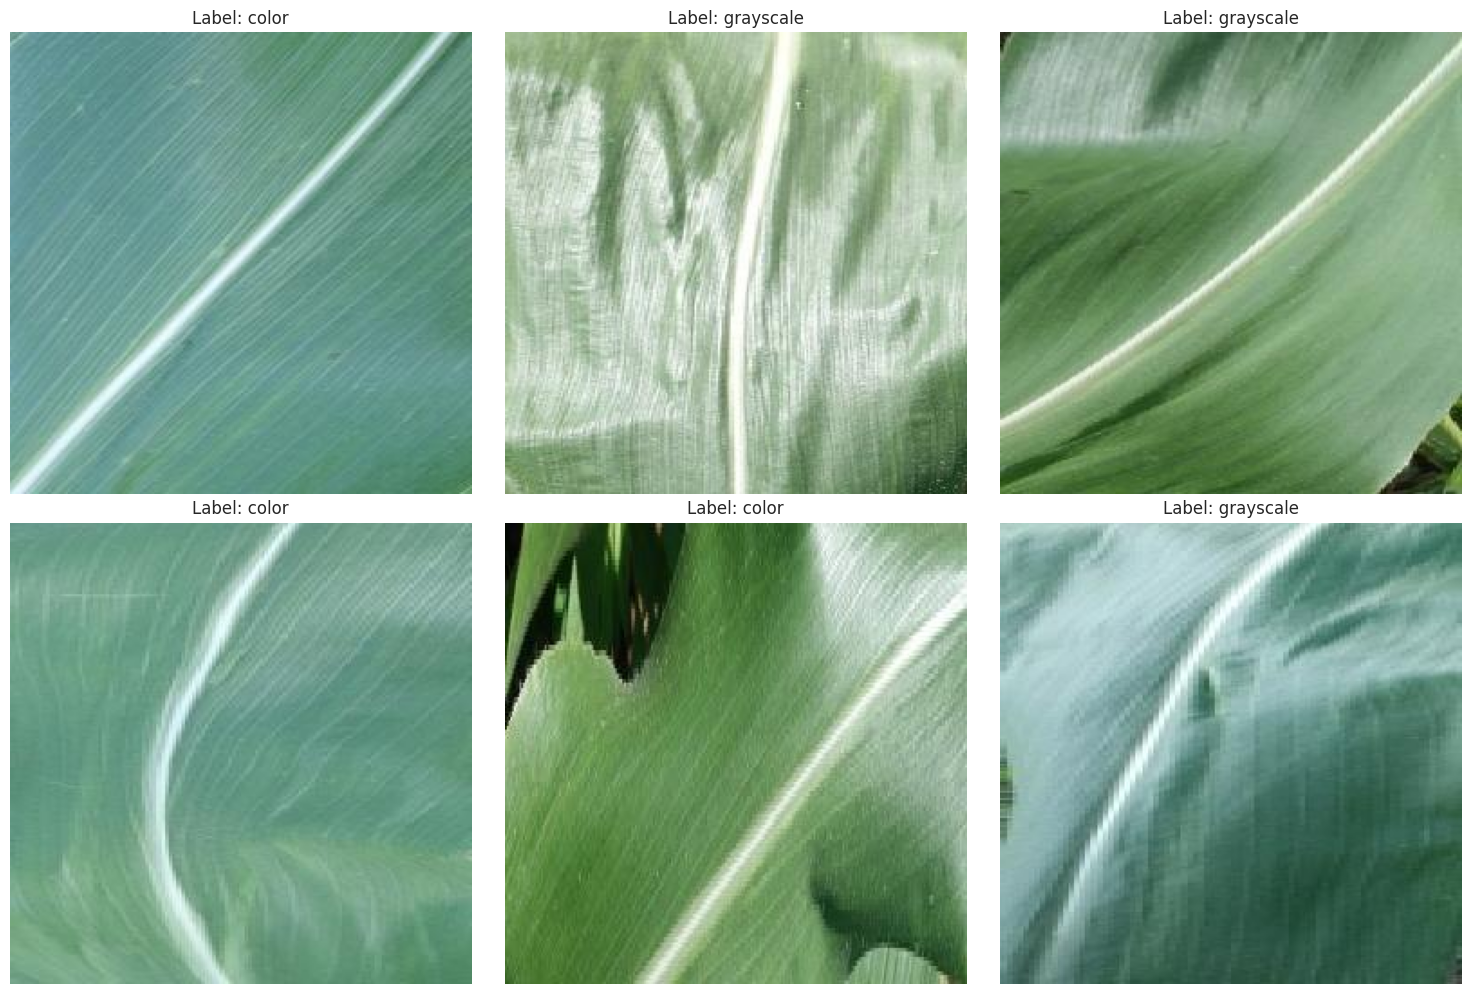

In [ ]:
import random

# Function to plot images with their labels
def plot_samples(df, num_samples=6):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        # Randomly select an image
        rand_idx = random.randint(0, len(df) - 1)
        img_path = df.iloc[rand_idx]['Filepaths']
        label = df.iloc[rand_idx]['Labels']

        # Read and plot the image
        img = plt.imread(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f'Label: {label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to plot 6 random samples
plot_samples(train_df)

In [ ]:
# Extract file paths and labels from train_df, valid_df and test_df
train_filepaths = train_df['Filepaths'].tolist()
train_labels = train_df['Labels'].tolist()

valid_filepaths = valid_df['Filepaths'].tolist()
valid_labels = valid_df['Labels'].tolist()

test_filepaths = test_df['Filepaths'].tolist()
test_labels = test_df['Labels'].tolist()

# Load images into NumPy arrays
train_images = []
for filepath in train_filepaths:
    img = cv2.imread(filepath)
    #img = cv2.resize(img, (224, 224))  # Resize images to the desired size
    train_images.append(img)
train_images = np.array(train_images)

valid_images = []
for filepath in valid_filepaths:
    img = cv2.imread(filepath)
    #img = cv2.resize(img, (224, 224))  # Resize images to the desired size
    valid_images.append(img)
valid_images = np.array(valid_images)

test_images = []
for filepath in test_filepaths:
    img = cv2.imread(filepath)
    #img = cv2.resize(img, (224, 224))  # Resize images to the desired size
    test_images.append(img)
test_images = np.array(test_images)

print("Shape of train_images:", train_images.shape)
print("Shape of valid_images:", valid_images.shape)
print("Shape of test_images:", test_images.shape)

# Print file paths causing the issue for valid images
print("File paths for invalid valid images:")
for i, (filepath, image) in enumerate(zip(valid_filepaths, valid_images)):
    if image is None:
        print(filepath)

# Print file paths causing the issue for test images
print("File paths for invalid test images:")
for i, (filepath, image) in enumerate(zip(test_filepaths, test_images)):
    if image is None:
        print(filepath)


Shape of train_images: (91, 256, 256, 3)
Shape of valid_images: (11,)
Shape of test_images: (12,)
File paths for invalid valid images:
/content/extracted/plantvillage dataset/segmented/Potato___Early_blight
/content/extracted/plantvillage dataset/grayscale/Squash___Powdery_mildew
/content/extracted/plantvillage dataset/color/Soybean___healthy
/content/extracted/plantvillage dataset/segmented/Tomato___Spider_mites Two-spotted_spider_mite
/content/extracted/plantvillage dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
/content/extracted/plantvillage dataset/grayscale/Peach___Bacterial_spot
/content/extracted/plantvillage dataset/segmented/Tomato___Early_blight
/content/extracted/plantvillage dataset/color/Tomato___Late_blight
/content/extracted/plantvillage dataset/grayscale/Apple___Apple_scab
/content/extracted/plantvillage dataset/segmented/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
/content/extracted/plantvillage dataset/segmented/Strawberry___healthy
File path

**BUILDING THE MODEL**

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf

# Define Xception as the base model
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='max')

# Create the model architecture
model = Sequential([
    base_model,  # Xception base model
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')

])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_9 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21394987 (81.62 MB)
Trainable params: 21336363 (81.39 MB)
Non-trainable params: 58624 (229.00 KB)
________

In [ ]:
# Assuming your DataFrame containing the dataset is named train_df
num_classes = train_df['Labels'].nunique()
print("Number of classes:", num_classes)


Number of classes: 3


**TRAINING THE MODEL**

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Load and preprocess images
def load_and_preprocess_images(filepaths):
    images = []
    for filepath in filepaths:
        img = cv2.imread(filepath)
        img = cv2.resize(img, (224, 224))  # Resize images to the desired size
        img = img / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Convert labels to integer-encoded labels
def encode_labels(labels):
    encoder = LabelEncoder()
    encoded_labels = encoder.fit_transform(labels)
    return encoded_labels

# Load and preprocess training images
train_images = load_and_preprocess_images(train_df['Filepaths'])
train_labels = encode_labels(train_df['Labels'])

# One-hot encode the integer-encoded labels
train_labels = tf.keras.utils.to_categorical(train_labels)

# Train the model
history = model.fit(
    train_images, train_labels,  # Training data
    batch_size=32,               # Adjust batch size as needed
    epochs=80,                    # Number of epochs
    validation_split=0.2         # Fraction of training data to use for validation
)


Epoch 1/80
3/3 [==============================] - 96s 20s/step - loss: 2.0112 - accuracy: 0.3889 - val_loss: 2.7119 - val_accuracy: 0.2632
Epoch 2/80
3/3 [==============================] - 71s 20s/step - loss: 0.7469 - accuracy: 0.7222 - val_loss: 2.9193 - val_accuracy: 0.2632
Epoch 3/80
3/3 [==============================] - 69s 20s/step - loss: 0.5499 - accuracy: 0.7917 - val_loss: 3.8958 - val_accuracy: 0.2632
Epoch 4/80
3/3 [==============================] - 66s 19s/step - loss: 0.1517 - accuracy: 0.9306 - val_loss: 4.3400 - val_accuracy: 0.2632
Epoch 5/80
3/3 [==============================] - 72s 21s/step - loss: 0.1439 - accuracy: 0.9306 - val_loss: 4.6498 - val_accuracy: 0.2632
Epoch 6/80
3/3 [==============================] - 68s 20s/step - loss: 0.0804 - accuracy: 0.9722 - val_loss: 4.7130 - val_accuracy: 0.2632
Epoch 7/80
3/3 [==============================] - 68s 20s/step - loss: 0.0993 - accuracy: 0.9444 - val_loss: 4.6869 - val_accuracy: 0.2632
Epoch 8/80
3/3 [===========

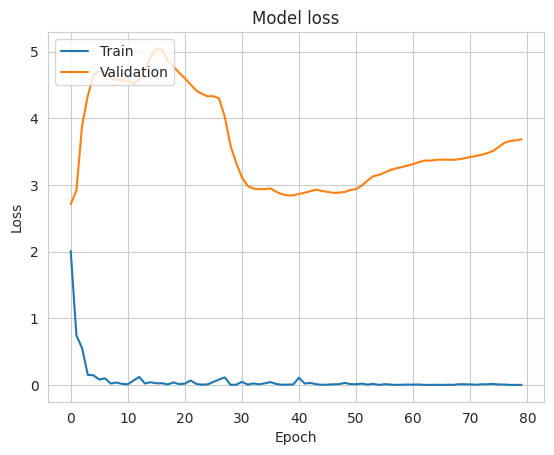

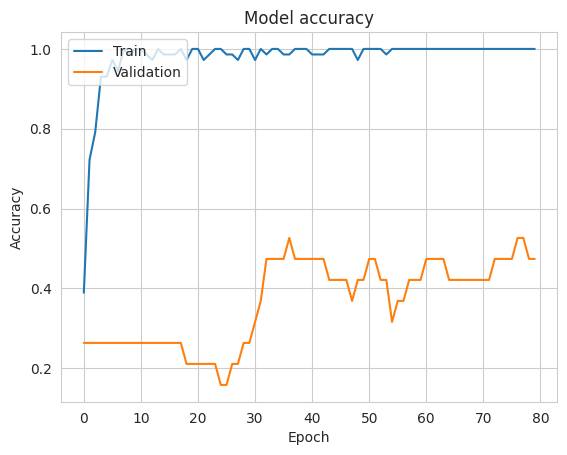

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**EVALUATE THE MODEL**

In [ ]:
import numpy as np

# Check for None values in test_images
print("None values in test_images:", np.any(test_images == None))

# Check for None values in test_labels
print("None values in test_labels:", np.any(test_labels == None))


None values in test_images: True
None values in test_labels: False


In [ ]:
# Print out test images and check for None values or invalid image data
for i, img in enumerate(test_images):
    if img is None:
        print(f"Test image {i + 1} is None.")
    elif not isinstance(img, np.ndarray):
        print(f"Test image {i + 1} is not a NumPy array.")
    elif img.ndim != 3 or img.shape[2] != 3:
        print(f"Test image {i + 1} has invalid shape: {img.shape}")

  # Print out file paths for test images
for i, filepath in enumerate(test_filepaths):
    print(f"Test image {i + 1} file path: {filepath}")



Test image 1 is None.
Test image 2 is None.
Test image 3 is None.
Test image 4 is None.
Test image 5 is None.
Test image 6 is None.
Test image 7 is None.
Test image 8 is None.
Test image 9 is None.
Test image 10 is None.
Test image 11 is None.
Test image 12 is None.
Test image 1 file path: /content/extracted/plantvillage dataset/grayscale/Peach___healthy
Test image 2 file path: /content/extracted/plantvillage dataset/grayscale/Corn_(maize)___Common_rust_
Test image 3 file path: /content/extracted/plantvillage dataset/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus
Test image 4 file path: /content/extracted/plantvillage dataset/segmented/Raspberry___healthy
Test image 5 file path: /content/extracted/plantvillage dataset/grayscale/Grape___Esca_(Black_Measles)
Test image 6 file path: /content/extracted/plantvillage dataset/color/Apple___Cedar_apple_rust
Test image 7 file path: /content/extracted/plantvillage dataset/grayscale/Tomato___Tomato_Yellow_Leaf_Curl_Virus
Test image 8 file path: /co

In [ ]:
# Check if the test image failed to load
if test_image is None:
    # Use the train set for evaluation
    print("For evaluation.")
    train_loss, train_accuracy = model.evaluate(train_images, train_labels)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_accuracy)
else:
    print("Test image loaded successfully.")


For evaluation.
3/3 [==============================] - 19s 5s/step - loss: 0.7701 - accuracy: 0.8901
Train Loss: 0.7700719237327576
Train Accuracy: 0.8901098966598511
